### Main aim for this notebook is to show how to plot basic bar plot and stacked diagram by using given data.
### We will also learn basic dataset operations using pandas library.
### If you like it please upvote my tutorial and follow my page on fb:
### https://www.facebook.com/codemakerz

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import math
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['RS_Session_246_AS11.csv', 'RS_Session_246_AU_98_1.1.csv']


## Read Dataset

In [2]:
df = pd.read_csv("../input/RS_Session_246_AU_98_1.1.csv")

In [3]:
df.tail()

,State/UT,2014 - Cases registered,2014 - Total rape Cases,2015 - Cases registered,2015 - Total rape Cases,2016 - Cases registered,2016 - Total rape Cases
32,Daman & Diu,16,2,29,5,41,12
33,Delhi,15319,2096,17222,2199,15310,2155
34,Lakshadweep,4,1,9,0,9,5
35,Puducherry,77,10,82,3,95,6
36,Total (All India),339457,36735,329243,34651,338954,38947


## Remove Total Count Column

In [4]:
df.drop(df.index[[36]], inplace=True)

## Check Missing Values

In [5]:
df.isnull().sum() # There are no missing values

State/UT                   0
2014 - Cases registered    0
2014 - Total rape Cases    0
2015 - Cases registered    0
2015 - Total rape Cases    0
2016 - Cases registered    0
2016 - Total rape Cases    0
dtype: int64

## Visualization

> ### State Vs Case Registered Agains Women

<Figure size 1080x1080 with 0 Axes>

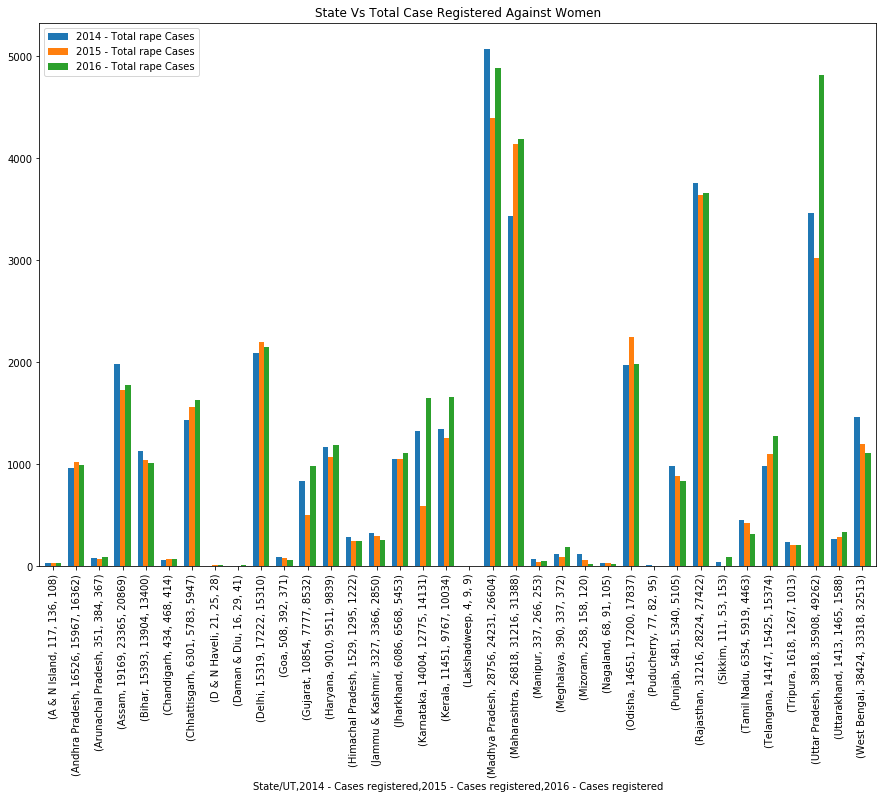

In [6]:
plt.figure(figsize=(15, 15));
df.groupby(["State/UT", "2014 - Cases registered", "2015 - Cases registered", "2016 - Cases registered"]).sum().plot(kind="bar",width=0.7, figsize=(15, 10), title="State Vs Total Case Registered Against Women");
plt.plot();

In [7]:
df.head()

,State/UT,2014 - Cases registered,2014 - Total rape Cases,2015 - Cases registered,2015 - Total rape Cases,2016 - Cases registered,2016 - Total rape Cases
0,Andhra Pradesh,16526,961,15967,1027,16362,994
1,Arunachal Pradesh,351,83,384,71,367,92
2,Assam,19169,1980,23365,1733,20869,1779
3,Bihar,15393,1127,13904,1041,13400,1008
4,Chhattisgarh,6301,1436,5783,1560,5947,1626


### State Vs Year wise Total Rape Case

<Figure size 1080x1080 with 0 Axes>

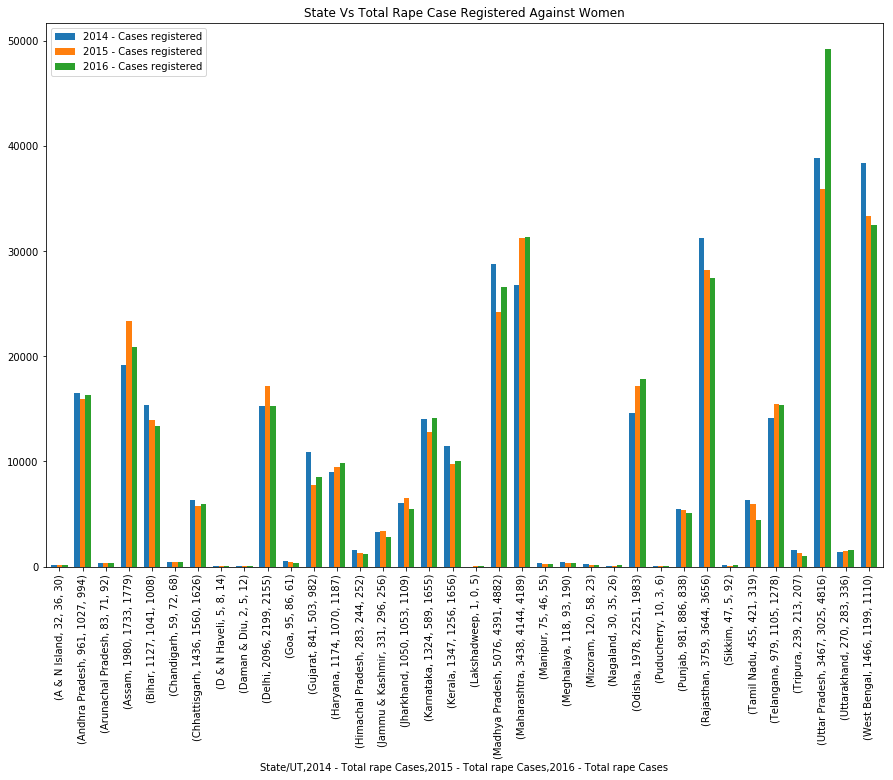

In [8]:
plt.figure(figsize=(15, 15));
df.groupby(["State/UT", "2014 - Total rape Cases", "2015 - Total rape Cases", "2016 - Total rape Cases"]).sum().plot(kind="bar",width=0.7, figsize=(15, 10), title="State Vs Total Rape Case Registered Against Women");
plt.plot();

In [9]:
df[["State/UT", "2014 - Cases registered", "2014 - Total rape Cases"]].head()

,State/UT,2014 - Cases registered,2014 - Total rape Cases
0,Andhra Pradesh,16526,961
1,Arunachal Pradesh,351,83
2,Assam,19169,1980
3,Bihar,15393,1127
4,Chhattisgarh,6301,1436


In [10]:
# adding rape percentage in 2014
df["Rape_2014_perc"] = (df["2014 - Total rape Cases"]/df["2014 - Cases registered"])*100
df["Rape_2014_perc"] = df["Rape_2014_perc"].map(lambda x: round(x, 2))

In [11]:
df.head()

,State/UT,2014 - Cases registered,2014 - Total rape Cases,2015 - Cases registered,2015 - Total rape Cases,2016 - Cases registered,2016 - Total rape Cases,Rape_2014_perc
0,Andhra Pradesh,16526,961,15967,1027,16362,994,5.82
1,Arunachal Pradesh,351,83,384,71,367,92,23.65
2,Assam,19169,1980,23365,1733,20869,1779,10.33
3,Bihar,15393,1127,13904,1041,13400,1008,7.32
4,Chhattisgarh,6301,1436,5783,1560,5947,1626,22.79


In [12]:
# Same add for 2015 & 2016
df["Rape_2015_perc"] = (df["2015 - Total rape Cases"]/df["2015 - Cases registered"])*100
df["Rape_2015_perc"] = df["Rape_2015_perc"].map(lambda x: round(x, 2))
df["Rape_2016_perc"] = (df["2016 - Total rape Cases"]/df["2016 - Cases registered"])*100
df["Rape_2016_perc"] = df["Rape_2016_perc"].map(lambda x: round(x, 2))

In [13]:
df.head()

,State/UT,2014 - Cases registered,2014 - Total rape Cases,2015 - Cases registered,2015 - Total rape Cases,2016 - Cases registered,2016 - Total rape Cases,Rape_2014_perc,Rape_2015_perc,Rape_2016_perc
0,Andhra Pradesh,16526,961,15967,1027,16362,994,5.82,6.43,6.08
1,Arunachal Pradesh,351,83,384,71,367,92,23.65,18.49,25.07
2,Assam,19169,1980,23365,1733,20869,1779,10.33,7.42,8.52
3,Bihar,15393,1127,13904,1041,13400,1008,7.32,7.49,7.52
4,Chhattisgarh,6301,1436,5783,1560,5947,1626,22.79,26.98,27.34


## State wise Rape Percentage

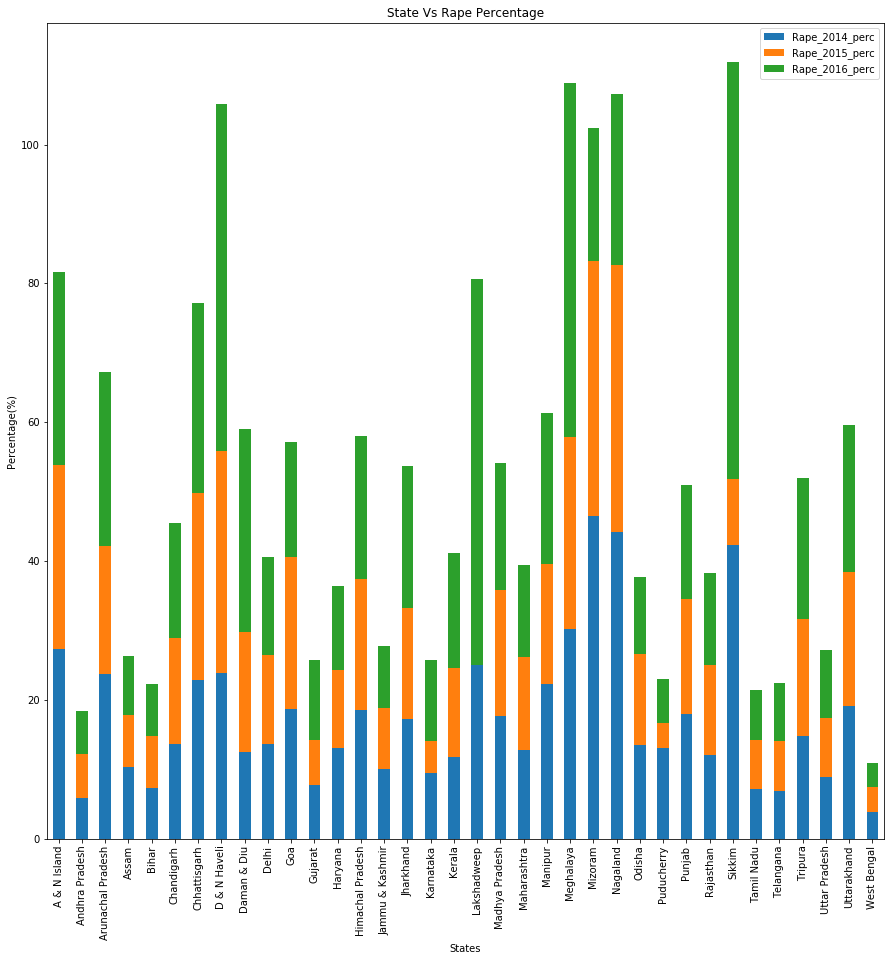

In [14]:

ax=df.groupby('State/UT')["Rape_2014_perc", "Rape_2015_perc", "Rape_2016_perc"].sum().plot.bar(stacked=True, figsize=(15, 15), title="State Vs Rape Percentage");
ax.set_xlabel("States");
ax.set_ylabel("Percentage(%)");

In [15]:
df2 = pd.read_csv("../input/RS_Session_246_AS11.csv")

In [16]:
df2.head()

,States/UTs,Rape - 2015,Rape - 2016,Assaults (molestation) - 2015,Assaults (molestation) - 2016,Murder (women) - 2015,Murder (women) - 2016
0,Andhra Pradesh,1027,994,4616,4829,428,411
1,Arunachal Pradesh,71,92,101,109,9,11
2,Assam,1733,1779,4293,3378,185,220
3,Bihar,1041,1008,198,324,340,318
4,Chhattisgarh,1560,1626,1868,1770,338,347


In [17]:
# Remove total column
df2.drop(df2.index[[37, 38, 29]], inplace=True)

In [18]:
df_only_states_ut = df2.iloc[:37, :]

In [19]:
df_only_states_ut.drop(df_only_states_ut.index[29], inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
df_only_states_ut

,States/UTs,Rape - 2015,Rape - 2016,Assaults (molestation) - 2015,Assaults (molestation) - 2016,Murder (women) - 2015,Murder (women) - 2016
0,Andhra Pradesh,1027,994,4616,4829,428,411
1,Arunachal Pradesh,71,92,101,109,9,11
2,Assam,1733,1779,4293,3378,185,220
3,Bihar,1041,1008,198,324,340,318
4,Chhattisgarh,1560,1626,1868,1770,338,347
5,Goa,86,61,150,143,11,16
6,Gujarat,503,982,1164,1224,269,288
7,Haryana,1070,1187,1886,1860,197,226
8,Himachal Pradesh,244,252,434,410,25,28
9,Jammu & Kashmir,296,256,1343,1235,19,24


## State wise Crime Bar plot

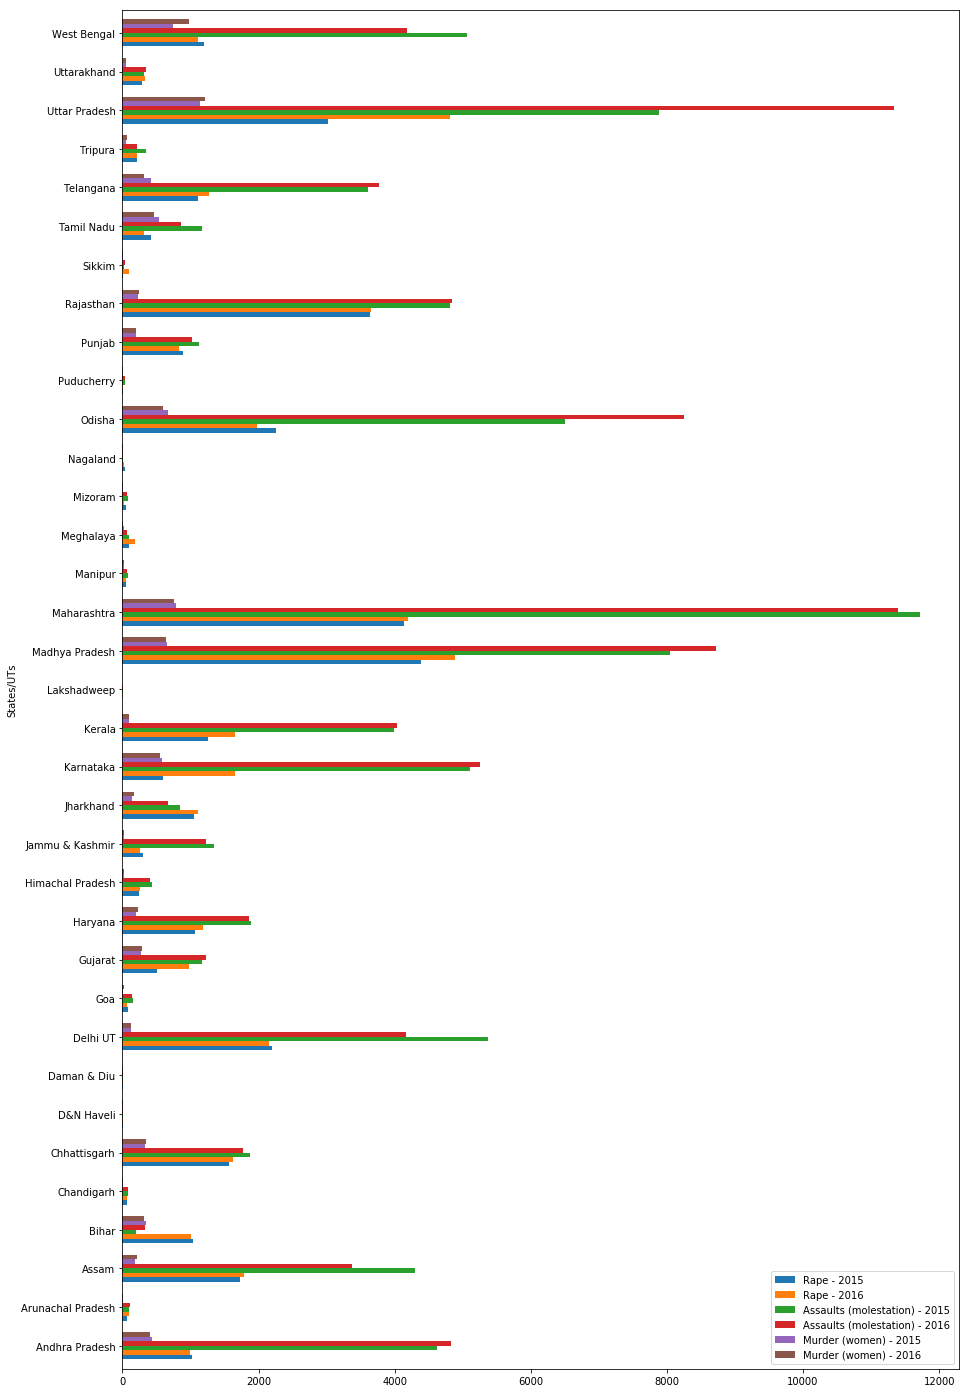

In [21]:
df_only_states_ut.groupby("States/UTs").sum().plot.barh(figsize=(15,25), width=0.7);

In [22]:
df2["total_crime"] = df2.sum(axis = 1, skipna = True)

In [23]:
df2.head()

,States/UTs,Rape - 2015,Rape - 2016,Assaults (molestation) - 2015,Assaults (molestation) - 2016,Murder (women) - 2015,Murder (women) - 2016,total_crime
0,Andhra Pradesh,1027,994,4616,4829,428,411,12305
1,Arunachal Pradesh,71,92,101,109,9,11,393
2,Assam,1733,1779,4293,3378,185,220,11588
3,Bihar,1041,1008,198,324,340,318,3229
4,Chhattisgarh,1560,1626,1868,1770,338,347,7509


## State Vs Total Crimes Logged

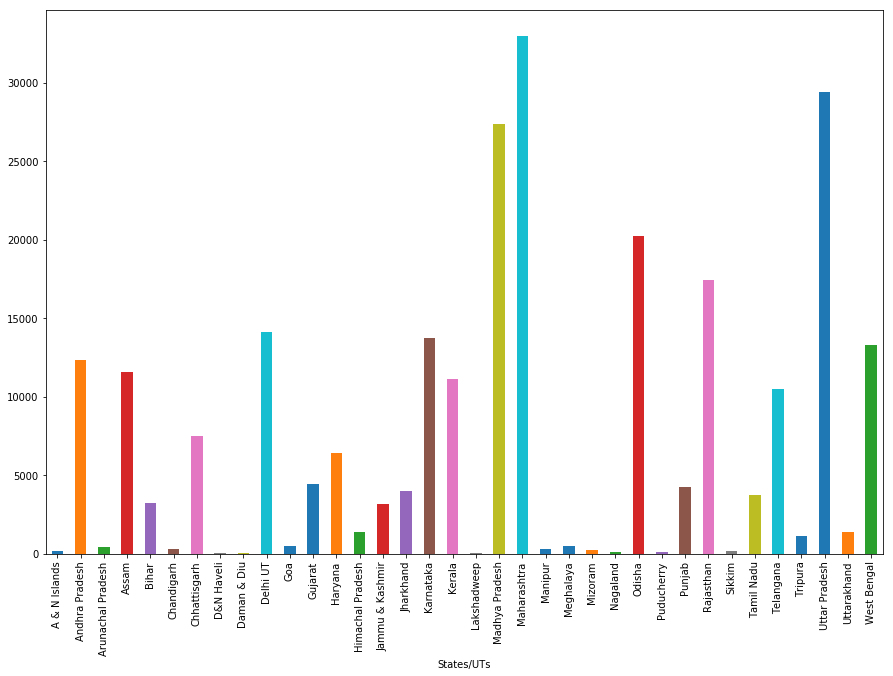

In [24]:
df2.groupby(["States/UTs"])["total_crime"].sum().plot.bar(figsize=(15, 10))